# Imports

In [1]:
import lightgbm as lgb

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../data/train.csv")
pd.set_option('display.max_columns', None)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Data analysis

<AxesSubplot:xlabel='season', ylabel='Count'>

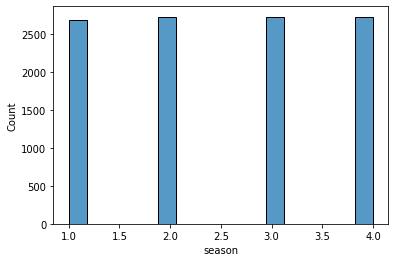

In [4]:
sns.histplot(data=df, x="season")

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

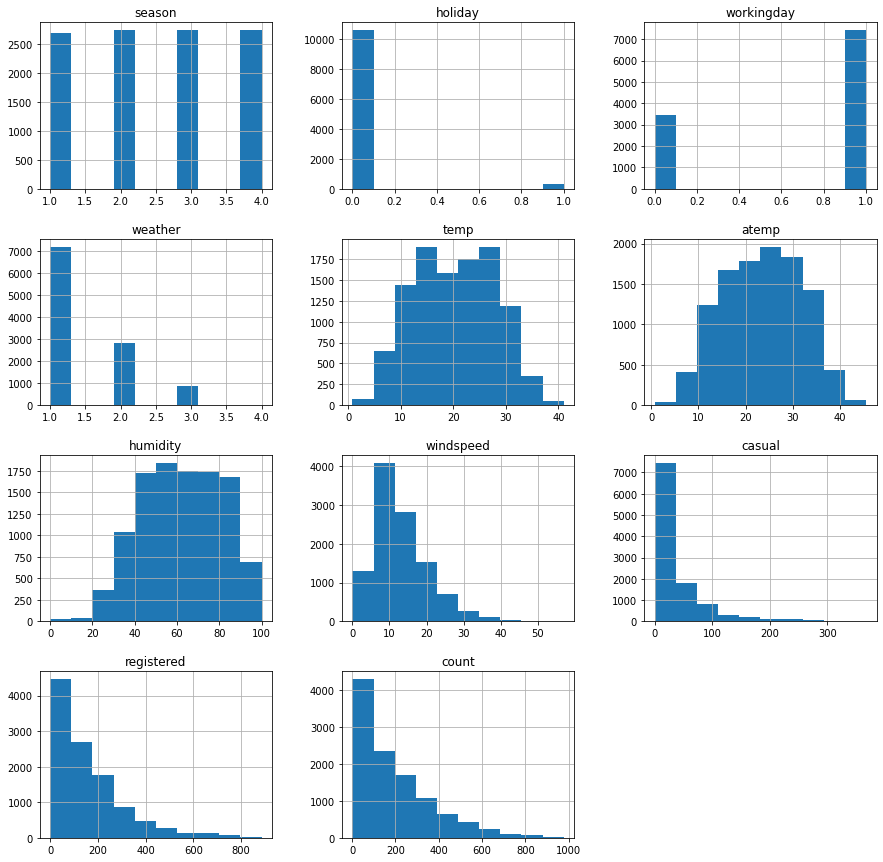

In [5]:
df.hist(figsize=(15, 15))

<AxesSubplot:>

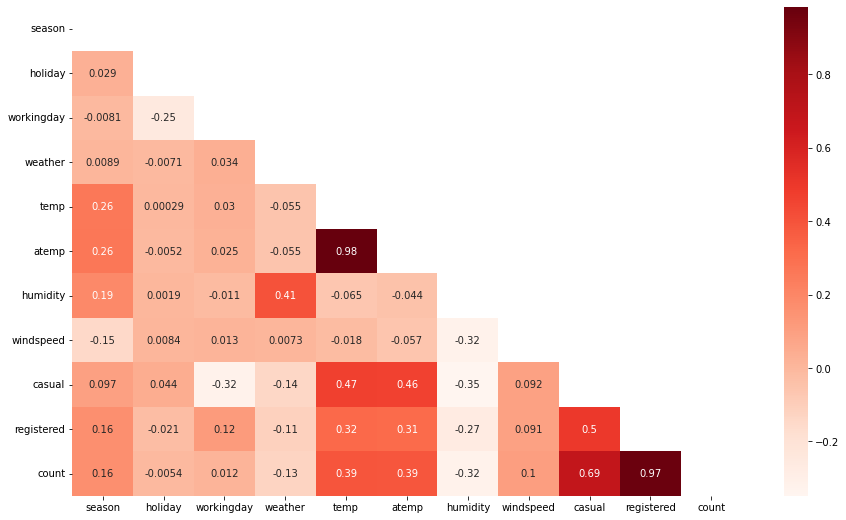

In [6]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(15, 9))

sns.heatmap(df.corr(), cmap='Reds', mask=mask, annot=True)

# Correlation 

<AxesSubplot:>

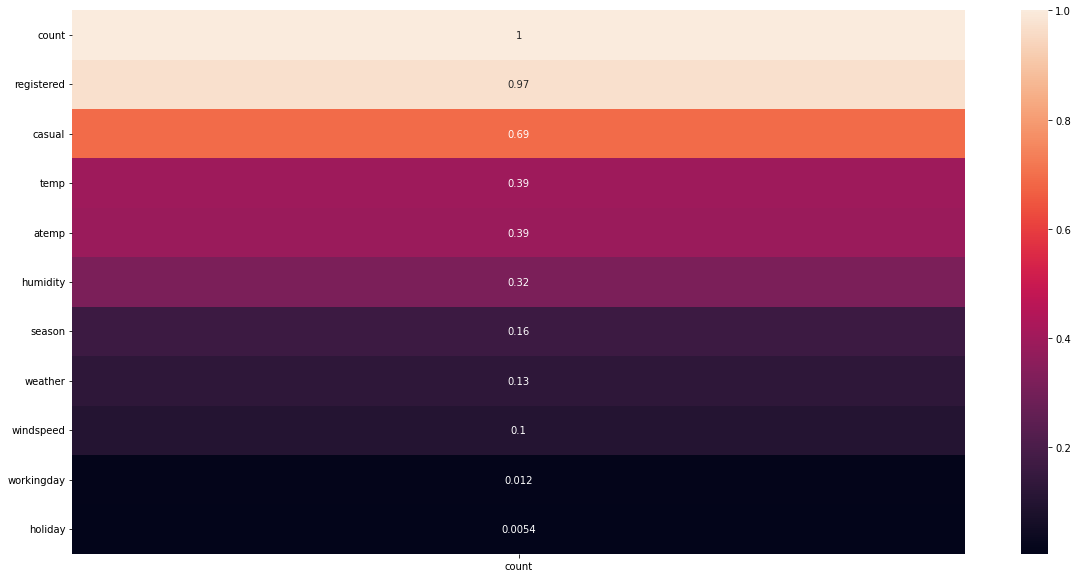

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs()[['count']].sort_values('count', ascending=False), annot=True)

- atemp et temp expliquent la même chose
- registered et casual font du data leaking (la somme vaut count)
- workingdat et holiday peuvent reçevoir un feature engineering
- season devrait être onehot ou autre (Il peut expliquer bcp d'autres choses mais pas comme ça)

<AxesSubplot:>

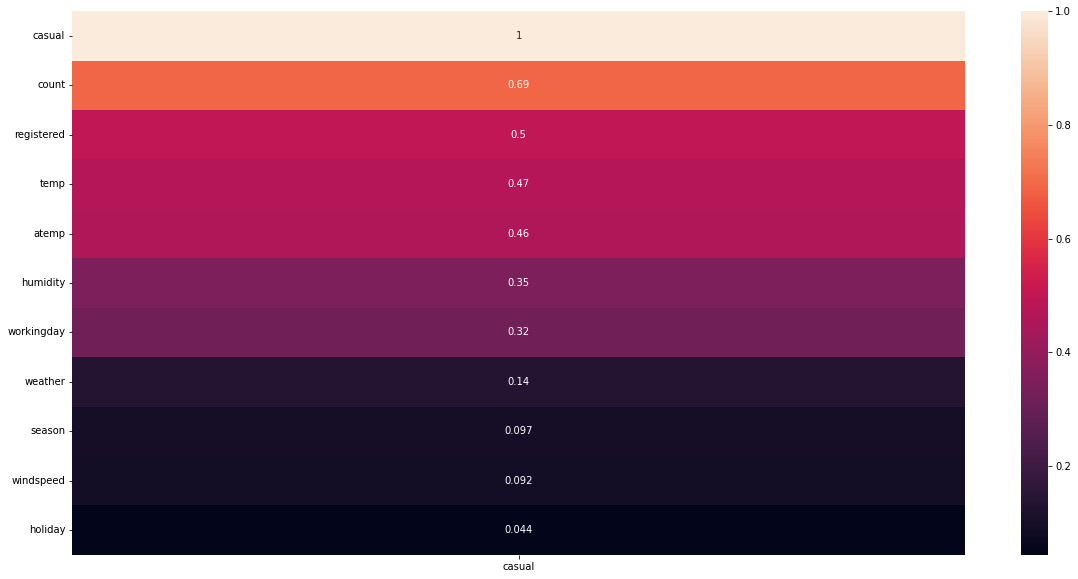

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs()[['casual']].sort_values('casual', ascending=False), annot=True)

<AxesSubplot:>

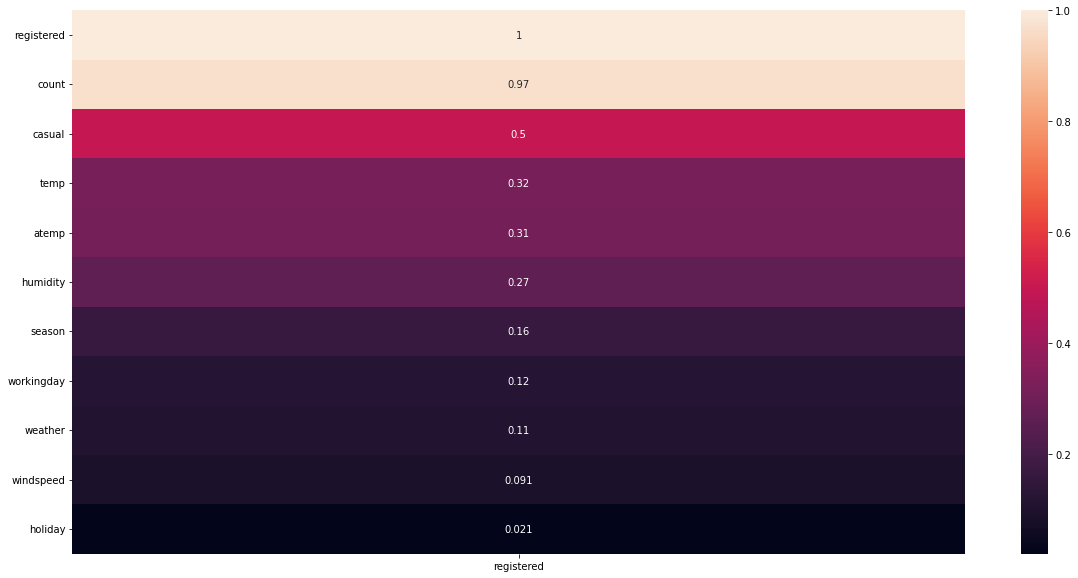

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs()[['registered']].sort_values('registered', ascending=False), annot=True)

In [10]:
raise

RuntimeError: No active exception to reraise

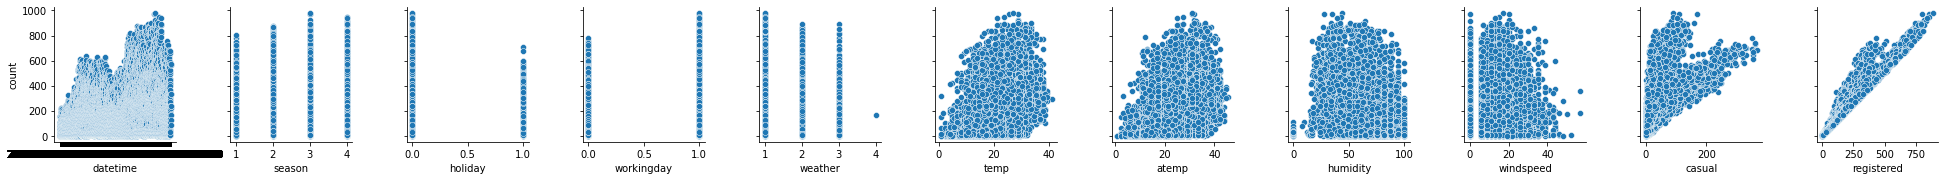

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(data = df, x_vars=df.drop("count", axis=1).columns, y_vars="count") #, vars=['price', 'sqft_living', 'sqft_lot'])

In [16]:
print("Df in holidays : ", df[df["holiday"] == 1].shape)
print("Df in holidays /24 : ", df[df["holiday"] == 1].shape[0] / 24)

Df in holidays :  (311, 12)
Df in holidays /24 :  12.958333333333334


In [17]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [18]:
df[df["workingday"] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [19]:
df[(df["workingday"] == 0) & (df["holiday"] ==1)] # Holidays aren't workingday

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10257,2012-11-12 19:00:00,4,1,0,1,22.14,25.760,73,19.0012,30,323,353
10258,2012-11-12 20:00:00,4,1,0,2,21.32,25.000,77,19.0012,31,273,304
10259,2012-11-12 21:00:00,4,1,0,3,22.14,25.760,73,15.0013,10,145,155
10260,2012-11-12 22:00:00,4,1,0,1,21.32,25.000,77,16.9979,12,100,112


# Feature engineering

In [20]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [21]:
df["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)

Note : All of these do not have a linear correlation with the count

In [23]:
df["day"] = df["datetime"].dt.day_name() # dt.weekday to have a number
df["day_nb"] = df["datetime"].dt.weekday

In [24]:
df["hour_of_day"] = df["datetime"].dt.hour

In [25]:
df["month"] = df["datetime"].dt.month 

Text(0.5, 1.0, 'Total number of bikes rented by date')

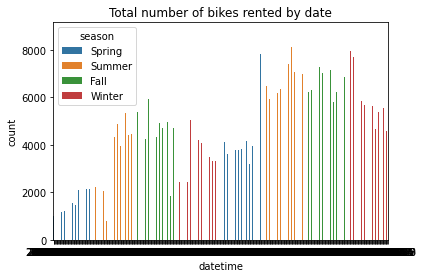

In [26]:
sns.barplot(x="datetime", y="count", data=df.groupby(df["datetime"].dt.date).agg({"count": "sum", "season": "first"}).reset_index(), hue="season")
plt.title("Total number of bikes rented by date")

Text(0.5, 1.0, 'Mean temperature by date')

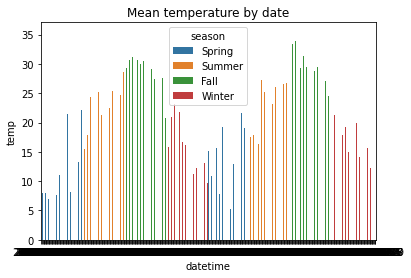

In [27]:
sns.barplot(x="datetime", y="temp", data=df.groupby(df["datetime"].dt.date).agg({"temp": "mean", "season": "first"}).reset_index(), hue="season")
plt.title("Mean temperature by date")

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
df["datetime"].dt.date

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: datetime, Length: 10886, dtype: object

In [32]:
# df_days = df.groupby(df["datetime"].dt.date).agg()
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,day_nb,hour_of_day,month
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday,5,0,1
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday,5,1,1
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday,5,2,1
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday,5,3,1
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,2,19,12
10882,2012-12-19 20:00:00,Winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,2,20,12
10883,2012-12-19 21:00:00,Winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,2,21,12
10884,2012-12-19 22:00:00,Winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,2,22,12


In [33]:
df["year"] = df.datetime.dt.year

In [34]:
# date_mask = ((df["datetime"]>= "2012-09-01") & (df["datetime"] <= "2012-12-31"))

# df.drop(["casual", "registered"], axis=1, inplace=True)
# X_train = df[~date_mask].drop(["count", "datetime"], axis=1)
# y_train = df[~date_mask]["count"]

# X_test = df[date_mask].drop(["count", "datetime"], axis=1)
# y_test = df[date_mask]["count"]

from sklearn.model_selection import train_test_split
X = df.drop(["count", "registered", "casual", "datetime"], axis=1)
y = df["count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
preprocessor = make_column_transformer(
    (OneHotEncoder(), ["season", "day", "hour_of_day", "month"]),
    remainder="passthrough"
)

In [36]:
model = Pipeline([("preprocessor", preprocessor), ("model", RandomForestRegressor())])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['season', 'day',
                                                   'hour_of_day', 'month'])])),
                ('model', RandomForestRegressor())])

In [37]:
y_pred = model.predict(X_test)

In [38]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2 = r2_score(actual, pred)
    return mae, np.sqrt(mse), r2

mae, rmse, r2 = eval_metrics(y_test, y_pred)
print(f"MAE: {mae}\nRMSE: {rmse}\nR2: {r2}")

MAE: 32.31797972145699
RMSE: 49.88556707302001
R2: 0.9293825986475196


In [39]:
# from lightgbm import Booster
from lightgbm import LGBMRegressor

lgboost = Pipeline([("preprocessor", preprocessor), ("model", LGBMRegressor())])
lgboost.fit(X_train, y_train)

y_pred = lgboost.predict(X_test)

In [40]:
mae, rmse, r2 = eval_metrics(y_test, y_pred)
print(f"MAE: {mae}\nRMSE: {rmse}\nR2: {r2}")

MAE: 30.041046881792308
RMSE: 45.69031641275934
R2: 0.9407606565820439
